#Table of Contents
* [QSB Project](#QSB-Project)
	* [Import modules](#Import-modules)
	* [Load raw data](#Load-raw-data)
		* [Question 1](#Question-1)
	* [Define functions to fit](#Define-functions-to-fit)
	* [Fit data to functions](#Fit-data-to-functions)
		* [Model definition with PySB](#Model-definition-with-PySB)
	* [Simulate perturbations in the rates](#Simulate-perturbations-in-the-rates)


#QSB Project

##Import modules

In [20]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from pysb import *
from pysb.macros import *
import pylab as pl
from pysb.integrate import odesolve
import pandas as pd
from IPython.display import HTML

##Load raw data

In [125]:
raw_data = pd.DataFrame.from_csv('EC-RP_IMS-RP_IC-RP_data_for_models.csv')
raw_data.index.name = raw_data.index.name.replace('# ','')
time = raw_data.index.values
IC_RP = raw_data['norm_IC-RP']
IMS_RP = raw_data['IMS-RP step']
EC_RP = raw_data['norm_EC-RP']

In [126]:
raw_data

,IC-RP,norm_IC-RP,nrm_var_IC-RP,IMS-RP,IMS-RP step,VAR,EC-RP,norm_EC-RP,nrm_var_EC-RP
Time,,,,,,,,,
180,0.7063,0.0000,0.0006,0,0,1,0.4451,0.0020,0.0003
360,0.7063,0.0000,0.0006,0,0,1,0.4460,0.0018,0.0003
540,0.7063,0.0000,0.0006,0,0,1,0.4459,0.0015,0.0003
720,0.7063,0.0000,0.0006,0,0,1,0.4458,0.0051,0.0003
900,0.7063,0.0000,0.0006,0,0,1,0.4474,0.0038,0.0002
1080,0.7063,0.0000,0.0006,0,0,1,0.4468,0.0042,0.0002
1260,0.7063,0.0000,0.0006,0,0,1,0.4470,0.0057,0.0003
1440,0.7063,0.0000,0.0006,0,0,1,0.4477,0.0022,0.0004
1620,0.7063,0.0000,0.0006,0,0,1,0.4461,0.0027,0.0004


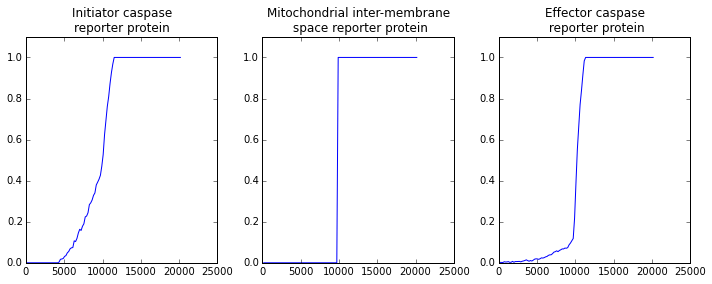

In [128]:
fig = plt.figure(figsize=(10,4))

ic_ax = fig.add_subplot(131)
ic_ax.plot(time,IC_RP)
ic_ax.set_ylim((0,1.1))
ic_ax.set_title("Initiator caspase \nreporter protein")

ims_ax = fig.add_subplot(132)
ims_ax.plot(time,IMS_RP)
ims_ax.set_ylim((0,1.1))
ims_ax.set_title("Mitochondrial inter-membrane\n space reporter protein")

ec_ax = fig.add_subplot(133)
ec_ax.plot(time,EC_RP)
ec_ax.set_ylim((0,1.1))
ec_ax.set_title("Effector caspase\n reporter protein")
fig.tight_layout()

###Question 1

Why is the shape of the normalized columns different from the raw counts?  
Looking at the raw data, the values are "stuck" in 1 after some time

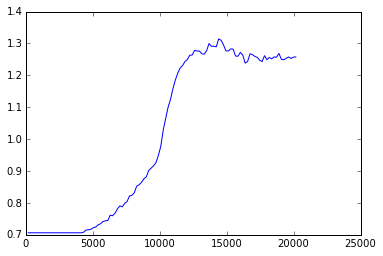

In [69]:
plt.plot(time,raw_data['IC-RP'])

##Define functions to fit

In [47]:
#We have to define the functions that we want to fit

def linea(x,a,b):
    return a*x+b


def expon(x,a,b,c):
    return a*np.exp(b*x)+c
    
    
def poli(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

##Fit data to functions

In [138]:
to_be_fitted = IC_RP
# to_be_fitted = IMS_RP
# to_be_fitted =  EC_RP


In [139]:
poptl, pcovl = curve_fit(linea,time,to_be_fitted)
poptp, pcovp = curve_fit(poli,time,to_be_fitted)
poptex, pcovex = curve_fit(expon,time,to_be_fitted, p0=(0.1, 1e-4,10))
 
linea_fit = linea(time,*poptl)
poli_fit = poli(time,*poptp)
expo_fit = expon(time,*poptex)

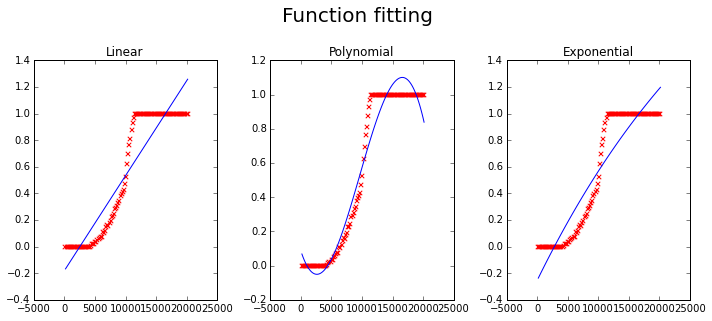

In [140]:
fig = plt.figure(figsize=(10,4))

line_ax = fig.add_subplot(131)
line_ax.plot(time,linea_fit)
line_ax.scatter(time,to_be_fitted,c='r',marker='x')
line_ax.set_title("Linear")

poly_ax = fig.add_subplot(132)
poly_ax.plot(time,poli_fit)
poly_ax.scatter(time,to_be_fitted,c='r',marker='x')
poly_ax.set_title("Polynomial")

exp_ax = fig.add_subplot(133)
exp_ax.plot(time,expo_fit)
exp_ax.scatter(time,to_be_fitted,c='r',marker='x')
exp_ax.set_title("Exponential")

fig.suptitle("Function fitting\n\n",y=1.1,fontsize=20)

fig.tight_layout()

###Model definition with PySB

In [ ]:
import csv
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from pysb import *
from pysb.macros import *
import pylab as pl
from pysb.integrate import odesolve

# some functions to make life easy
site_name = 'b'
# klist is k_f & k_r k_c <- input for sampling
def catalyze_b(enz, sub, product, klist):
    """Alias for pysb.macros.catalyze with default binding site 'b'.
    """
    return catalyze(enz, site_name, sub, site_name, product, klist)

#table is for k_f and k_r in a list per field
def bind_table_b(table):
    """Alias for pysb.macros.bind_table with default binding sites 'bf'.
    """
    return bind_table(table, site_name, site_name)

# Default forward, reverse, and catalytic rates
# these are catalytic rates <- mess with this
KFc = 8.6897973656754578e-07 #1e-6
KRc = 0.00026884384823502833 #1e-3
KCc = 7.9623024965305493 #1

KFb = 4.149733352245889e-09 #1e-7
KRb = 0.00050110975371602537 #1e-3
KCb = 0.39197357243506348 #1

KFba = 2.2299766742556005e-08 #1e-6
KRba = 0.0018670344174003893 #1e-3
KCba = 0.41085725049645588 #1

KFm = 1.2128334849034545e-07 #2e-6
KRm = 0.011242081848190973 #10e-3 
KCm = 17.003767066674314 #10

KFs = 4.0379463916345119e-05 #1e-6
KRs = 0.0024327371579203338 #10e-3 
KCs = 0.012083736473176411 #1





# Bcl2 Inhibition Rates
# OLD bcl2_bid_rates = [1e-6, 1e-3] # 1.0e-6/v_mito

# this is what I have to change <- bind_table
bcl2_bid_rates = [2.3147601898026888e-06, 0.0017312607994352624] # 1.0e-6/v_mito
bcl2_bax_rates = [9.9990412921086819e-05, 2.0740711292172149e-05]
# instantiate a model
Model()

# declare monomers
Monomer('C8', ['b'])
Monomer('Bid',    ['b', 'S'], {'S':['n', 't']})
Monomer('Bax',   ['b', 'S'], {'S':['d', 'a']})
Monomer('M',   ['b', 'S'], {'S':['c', 'p']})
Monomer('Smac', ['b', 'S'], {'S':['m', 'r']})
Monomer('PARP', ['b', 'S'],  {'S':['n', 'c']})
Monomer('Bcl2', ['b'])


synthesize(C8(b=None), 0.032866241994187327)
catalyze_b(C8, Bid(S='n'), Bid(S='t'), [KFc, KRc, KCc])
# Activate Bax
catalyze_b(Bid(S='t'), Bax(S='d'), Bax(S='a'), [KFb, KRb, KCb])

# Activate Bax/Bak
catalyze_b(Bax(S='a'), M(S='c'), M(S='p'), [KFba, KRba, KCba])
catalyze_b(M(S='p'), Smac(S='m'), Smac(S='r'), [KFm, KRm, KCm])
catalyze_b(Smac(S='r'), PARP(S='n'), PARP(S='c'), [KFs, KRs, KCs])
# this goes to bind_table()
bind_table_b([[                  Bcl2],
              [Bid(S='t'), bcl2_bid_rates  ],
              [Bax(S='a'), bcl2_bax_rates  ]])

# Bid, Bax, BclxL "transport" to the membrane
#equilibrate(Bid(b=None, S='t'),   Bid(b=None, S='m'), [1e-1, 1e-3])
#equilibrate(Bax(b=None, S='m'),   Bax(b=None, S='a'), [1e-1, 1e-3])
#equilibrate(BclxL(b=None, S='c'), BclxL(b=None, S='m'), [1e-1, 1e-3])


# initial conditions concentrations
Parameter('C8_0',    0)
Parameter('Bid_0',   4e4)
Parameter('Bax_0',  1e5)
Parameter('M_0',  5e5)
Parameter('Smac_0', 1e5)
Parameter('PARP_0',  1e6)
Parameter('Bcl2_0',  2e4)

Initial(C8(b=None), C8_0)
Initial(Bid(b=None, S='n'), Bid_0)
Initial(Bax(b=None, S='d'), Bax_0)
Initial(M(b=None, S='c'), M_0)
Initial(Smac(b=None, S='m'), Smac_0)
Initial(PARP(b=None, S='n'), PARP_0)
Initial(Bcl2(b=None), Bcl2_0)


# Observables
Observable('mBid', Bid(b=None, S='t'))
Observable('aSmac', Smac(b=None, S='r'))
Observable('cPARP', PARP(b=None, S='c'))



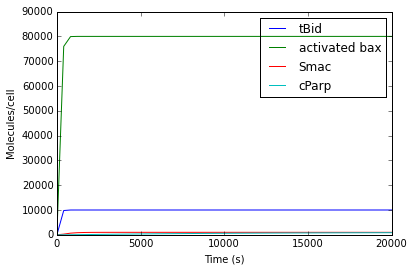

In [120]:
plt.plot(t, yout['obstBid'], label="tBid")
# obsC8 is not defined
# plt.plot(t, yout['obsC8'], label="C8")
plt.plot(t, yout['obsBax'], label='activated bax')
plt.plot(t, yout['obsSmac'], label='Smac')
plt.plot(t, yout['obsParp'], label='cParp')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Molecules/cell")


##Simulate perturbations in the rates

The idea in this section is to systematically modify the the rates of the different reactions, and see which perturbations causes more damage.  
Here, I think by "damage" I mean: distance from the empirically determined model. It will assume that the empirically determined model is optimal, though. We can think of another standard.  
  
  
I propose two alternatives
* Randomly disturb the rates
* Systematically increase the rates from 0 to X (and all combinations of rates)

In [12]:
def mess_it_up(number):
    '''
    Take a number (rate), and add/substract a
    random number from it
    Given that it could take negative values,
    maybe scaling it could be a better idea,
    because truncating the substraction if <0
    is kind of dirty and not "as random" as
    it should be. Another option is to use a 
    positively bounded distribution
    '''
    sign = np.random.choice([-1,1])
    # It would be better to use a more elegant
    # distribution
    to_be_added = np.random.rand()
    print(sign*to_be_added)

In [14]:
mess_it_up(2)

-0.164392712836


In [15]:
def pick_rate(things):
    '''
    given a set of "things" (dict, list)
    return a subset of them that will be messed up
    '''
    chosen =[]
    for thing in things:
        if np.random.choice([0,1]):
            chosen.append(thing)
    return chosen

In [19]:
pick_rate([1,2,3,4,5])

[1, 2, 3]

##Models comparison
If we can transform the output to be compared in the model (one specific product, trajectories, etc) to a probability distribution (by calculating proportions, relative frequences, etc), I think that the Jensen-Shannon distance is a good idea. It is based in information theory, it is quite robust, it doesn't need those nasty p-values, and it handles different parameters space quite well

In [25]:
HTML('<iframe src="http://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence" style="border:none" width="800" height="400"></iframe>')

###JSD implementation

In [ ]:
def DLK(u,v,epsilon,bg):
    '''
    Calculate Kullback-Leibler divergence
    u,v: numpy arrays
    e: epsilon -> pseudocounts to add
    bg: background weight. Under a uniform distribution, bg is 1/(4^k)
    '''
    ps_count = epsilon * bg
    # Get proportions and add pseudocount
    u_prop = (u + ps_count) / sum(u)
    v_prop = (v + ps_count) / sum(v)
#     dlk = sum(u_prop * np.log(u_prop/v_prop))
    dlk = sum(u_prop * np.log2(u_prop/v_prop))
    return dlk

def JSD(u,v,epsilon,bg):
    '''
    Calculate the Jensen-Shannon distance
    u,v: numpy arrays
    e and bg are arguments for DLK
    e: epsilon -> pseudocounts to add
    bg: background weight. Under a uniform distribution, bg is 1/(4^k)
    '''
    m = (u + v) / 2
    # Calculate Jensen-Shannon divergence
    js_div = (DLK(u,m,epsilon,bg) + DLK(v,m,epsilon,bg)) / 2
    #Calculate Jensen-Shannon distance
    jsdist = np.sqrt(js_div)
    return jsdist

Goodness of fit of the data to the perturbed model

```{python}
for k1
    for k2
        for k3
        .
        .
        .
        euclidian against experimental values
return {k1[k2][k3] = 
```

$chi^2$ -> one parameter at the time, look for robustness
look which parameter perturbs each one of the output curves (tbid...)